# Part 2: Agglomerative Hierarchical Clustering
As the second algorithm implemented for this assignment, the agglomerative clustering is tested and optimized in this notebook file. Here both the differences between the results are highlighted and the correctness of the algorithm is shown.

## Necessary Imports
Just like the previous part (*Part 1: K-Means Clustering*) the *data_ops.py* file with time and matplotlib libraries are used in order to perform plotting and time related operations. The implementation of the clustering algorithm is given in the file *agglomerative_k_means.py* file.

In [1]:
%matplotlib inline
from data_ops import *
from agglomerative_k_means import *
import time
import matplotlib.pyplot as plt

## Loading the data
Following the same pattern with the Data Expolariton part and Part 1, the image to be clustered is loaded from the path **data/sample.jpg** from the local directory. After loading the data, the dimensions are outputted below.

In [2]:
# Loading the file
file_path = "data/sample.jpg"
sample = load_data(file_path)
print("DATA LOADED")
print("Shape of data: {}".format(sample.shape))

DATA LOADED
Shape of data: (435, 510, 3)


## Visualizing the image to be clustered
In order to see the observe whether the clustering algorithm can represent the image with lower amount of clusters, the original image is visualized. The visualized image is given below.

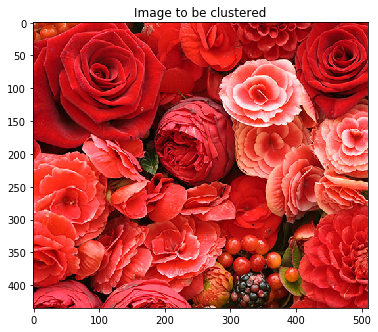

In [3]:
def visualize_image(data, title):
    data = np.array(data, dtype=np.int_)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_title(title, fontsize=12)
    ax.imshow(data)
visualize_image(sample, "Image to be clustered")

## Testing the effect of the number of clusters used
In order to perform the analysis regarding the number of clusters used, the following function is used. Considering the findings from Part 1, the initial number of clusters are finalized as 100. The analysis consists of a comparison of execution times, clustering errors and performs the computation of the clustered image.

In [4]:
def k_analysis(data, k_values):
    results = []
    for k in k_values:
        start = time.time()
        classifier = AgglomerativeKMeans(data, initial_clusters=100)
        classifier.mean_clustering(target_clusters=k)
        error = classifier.evaluate()
        final_img = classifier.apply_model()
        end = time.time()
        result = {"exec_time": end - start, "final_img": final_img, "error": error, "k": k, "centroids": classifier.centroids}
        results.append(result)
    return results
initial_results = k_analysis(sample, (2,3,4,5,6,10))

## Visualizing the analysis results
The utility functtions used in order to visualize and report the results obtained are given below. The functions implemented perform the following tasks in the respective order:
- Visualizing the clustered image
- Visualizzing the change in clustering error
- Visualizing the change in execution time
- Visualizing the mean vectors(centroids) by using their pixel values

In [14]:
def show_result_img(results):
    fig, axes = plt.subplots(len(results), figsize=(6, 36))
    for img_idx in range(len(results)):
        axes[img_idx].imshow(results[img_idx]["final_img"].astype(int))
        axes[img_idx].set_title("Image clustered with K = {}".format(results[img_idx]["k"]))

def show_result_error(results):
    errors = []
    k_values = []
    for experiment in results:
        errors.append(experiment["error"])
        k_values.append(experiment["k"])
    plt.plot(k_values, errors)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Clustering Error")
    plt.title("Clustering Error for changing K values")
    print("Error Values: {}".format(np.round(errors, 4)))

def show_result_time(results):
    times = []
    k_values = []
    for experiment in results:
        times.append(experiment["exec_time"])
        k_values.append(experiment["k"])
    plt.plot(k_values, times)
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Execution Time")
    plt.title("Execution Time for changing K values")
    print("Execution Times: {}".format(np.round(times, 4)))
    
def show_centroids(results):
    fig, axes = plt.subplots(len(results), figsize=(6,20))
    for experiment in range(len(results)):
        colors = results[experiment]["centroids"].astype(int)
        axes[experiment].set_title("Mean Vectors for K = {}".format(results[experiment]["k"]))
        axes[experiment].imshow(np.reshape(colors, (1, len(colors), colors.shape[-1])))
        print("Centroids for K = {}: {}".format(results[experiment]["k"], np.round(results[experiment]["centroids"], 2)))

## Change in Clustering Error
Here the clustering error values are reported in order to see the effect of the number of clusters used on the value of error. The initial observation is that, the change in the clustering error does not show a directly proportional relationship with the number of clusters used. Since Agglomerative Clustering algorithm tends to find the furthest clusters, it does not guarantee that the reduced clusters will give the minimum clustering error value. This leads to the fact that the algorithm will give accurate results for optimal amount of hierarchies and the results will get worse in further iterations. The results obtained is given below.

Error Values: [82.3266 66.9959 71.0176 41.2318 59.4499 55.212 ]


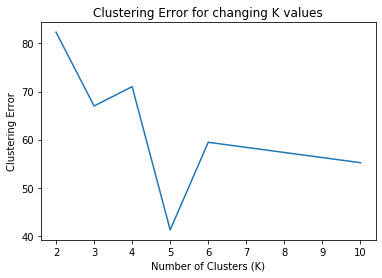

In [6]:
show_result_error(initial_results)

## Change in Execution Time
Considering that the most time consumimg operation for the algorithm is to identifying the initial clusters (by using k-Means clustering), the cluster elimination is not expected to take signnificant amount of time. Due to this fact, the main expectation is that the execution times would not be directly proportional with the number of clusters. However, considering the algorithm, the experiments that wants to eliminate more clusters have a higher probability to be completed in more time. The results for the computational time is given below.

Execution Times: [81.7593 75.3468 88.8415 86.6628 74.7245 85.6358]


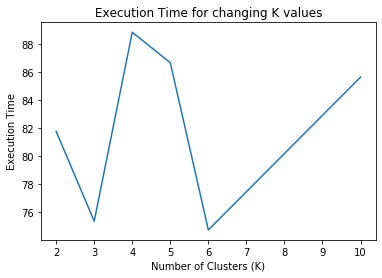

In [7]:
show_result_time(initial_results)

## Clustered images for $k \in (2,3,4,5,6,10)$ 
Concluding the analysis, the clsutered images for different amount of clusters are given below. Considering the images obtained for different amount of clusters, it is clear the colors used are as distinct as possible in terms of RGB values. Here as the number of clusters approaches to the optimal amount of hierarchies, the predictive performance significantly increase. This can be observed clearly in the difference between the imagewith 6 and 10 clusters.

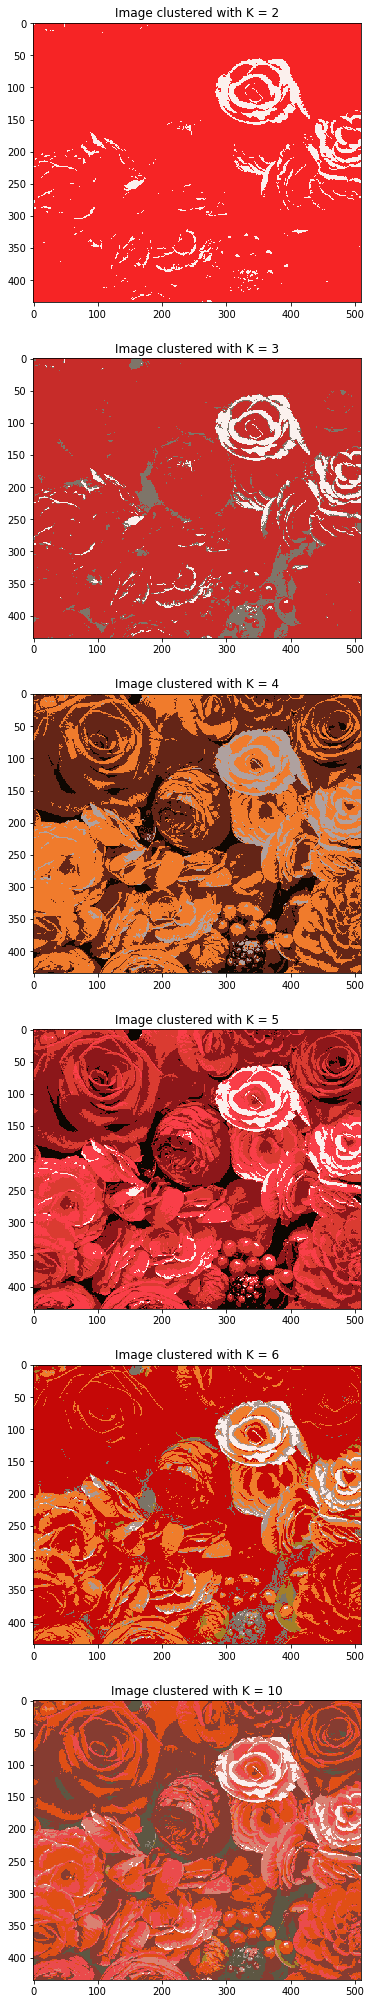

In [8]:
show_result_img(initial_results)

## Visualizing the Centroids
In order to both prove that the algorithm finds clusters which has centers as far as possible, and observe the values of the centroids, they are visualized using their RGB values. The results are given below. As expected, the difference between the centroid values are larger compared to the results obtained for regular k-Means clustering.

Centroids for K = 2: [[251.81 240.09 237.56]
 [246.17  36.5   37.4 ]]
Centroids for K = 3: [[199.49  44.08  41.66]
 [251.77 241.02 238.33]
 [126.81 117.63 105.12]]
Centroids for K = 4: [[240.63 123.83  44.2 ]
 [ 14.05   7.14   2.7 ]
 [100.53  37.62  23.54]
 [175.68 161.36 159.11]]
Centroids for K = 5: [[218.35  59.1   49.25]
 [249.1   62.03  72.48]
 [251.81 240.11 237.56]
 [ 12.01   7.78   2.86]
 [140.67  23.82  26.57]]
Centroids for K = 6: [[123.11 116.71 103.51]
 [163.62 127.02  39.11]
 [171.58 152.09 145.37]
 [239.73 125.91  43.84]
 [251.78 239.61 237.1 ]
 [197.52   8.89   7.54]]
Centroids for K = 10: [[ 93.48  87.62  67.51]
 [174.02 152.05 144.99]
 [134.9   60.42  49.32]
 [224.55  79.97  21.14]
 [234.9   75.57  76.12]
 [126.17 119.42 106.71]
 [217.22 129.49 114.59]
 [251.78 238.58 236.1 ]
 [239.89 125.79  44.05]
 [163.71 130.08  41.85]]


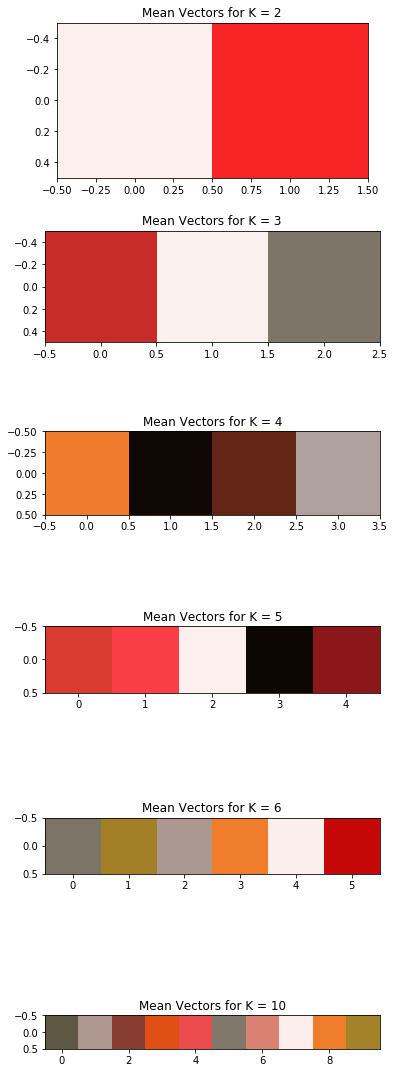

In [15]:
show_centroids(initial_results)

## Finding the optimum number of clusters
In order to find the optimum number of clusters, different number of final clusters are tried out. Here the tried parameters for the number of clusters are (2, 6, 10, 15, 20, 30, 50, 90).

In [10]:
experiment_k_values = (2, 6, 10, 15, 20, 30, 50, 90)
overall_results = k_analysis(sample, experiment_k_values)

## Determining the optimum number of clusters
After getting the results of the experiment, the change in the clustering error values is visualized. Considering the plot given below, it is observed that the last significant change in the clsutering error value is in the range [20, 50]. So the optimum point is selected as the observation done in the middle of these values, which leads to 30 clusters.

Error Values: [102.6358  49.3624  46.6324  39.3284  29.5003  25.6229  18.9268   9.5837]


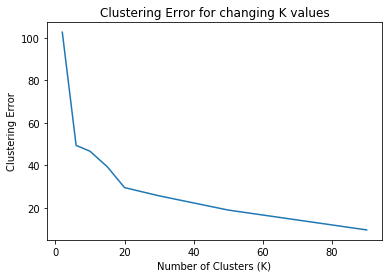

In [11]:
show_result_error(overall_results)

## Visualizing the clustered image with optimum number of clusters
After performing the search for the optimum amount of clusters, the image is clustered for the last time, with optimal number of clusters ($k = 30$). The resulting image and the clustering error is given below.

In [12]:
def display_clustered_image(data, k):
    classifier = AgglomerativeKMeans(data, initial_clusters=100)
    classifier.mean_clustering(target_clusters=k)
    error = classifier.evaluate()
    print("Error for K = {}: {}".format(k, np.round(error, 4)))
    final_img = classifier.apply_model().astype(int)
    visualize_image(final_img, "Clustered Image with K = {}".format(k))

Error for K = 30: 23.5158


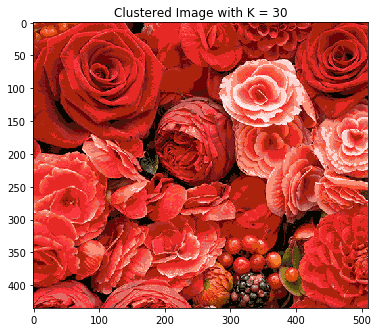

In [13]:
display_clustered_image(sample, 30)

## Effect of changing the number of clusters around the optimum value
In order to see the effect of using more and less hierarchies than necessary, the visualization for number of clusters (15, 20, 30, 50, 90) are visualized. As it can be observed, the resulting image tend to include more details with more clusters. For number of clusters below the optimum point, the nature of the image seems disrupted due to the nature of the Agglomerative Clustering algorithm based on the distances of mean vectors (centroids). 

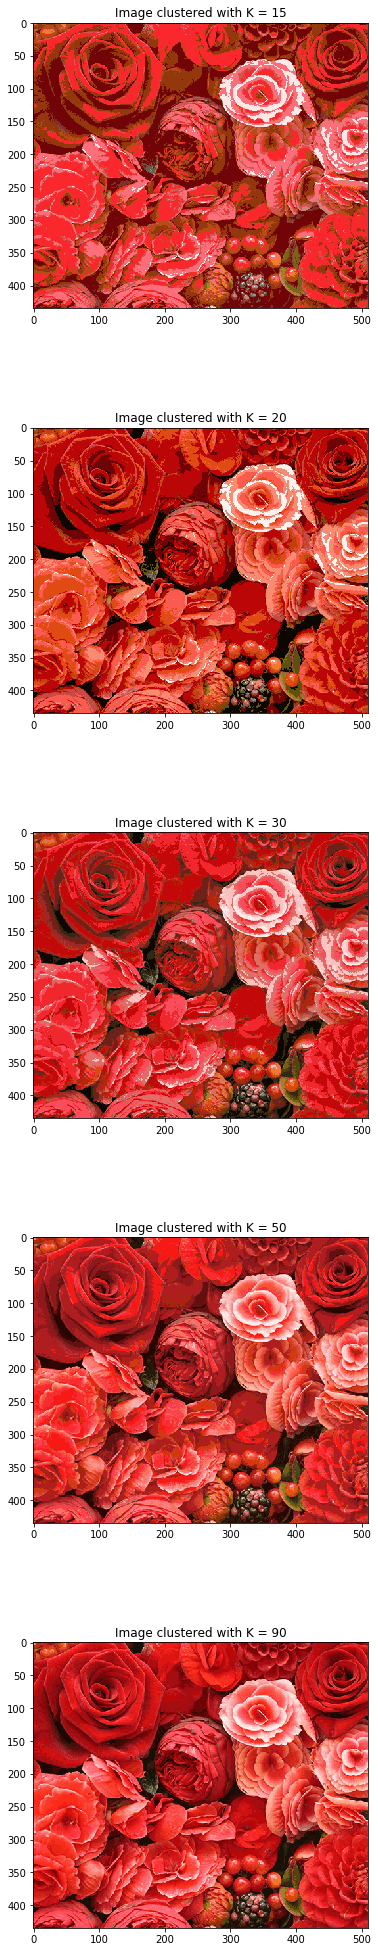

In [16]:
show_result_img(overall_results[-5:])